# РК1 Чугунов А.В. ИУ5-62Б
## Описание датасета Toy Dataset
Этот датасет содержит демографические и финансовые данные о людях. В него входят 6 столбцов: уникальный идентификатор (Number), город проживания (City), пол (Gender), возраст (Age), доход (Income) и информация о наличии заболеваний (Illness). Данные включают как числовые (Age, Income), так и категориальные признаки (City, Gender, Illness), что делает набор удобным для отработки методов предобработки данных - масштабирования числовых значений и кодирования категориальных переменных. Небольшой размер и простота данных позволяют быстро экспериментировать с различными методами анализа и визуализации.
### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Загрузка данных
data = pd.read_csv("toy_dataset.csv")
print("Первые 5 строк данных:")
print(data.head())

Первые 5 строк данных:
   Number    City Gender  Age   Income Illness
0       1  Dallas   Male   41  40367.0      No
1       2  Dallas   Male   54  45084.0      No
2       3  Dallas   Male   42  52483.0      No
3       4  Dallas   Male   40  40941.0      No
4       5  Dallas   Male   46  50289.0      No


### Масштабирование данных

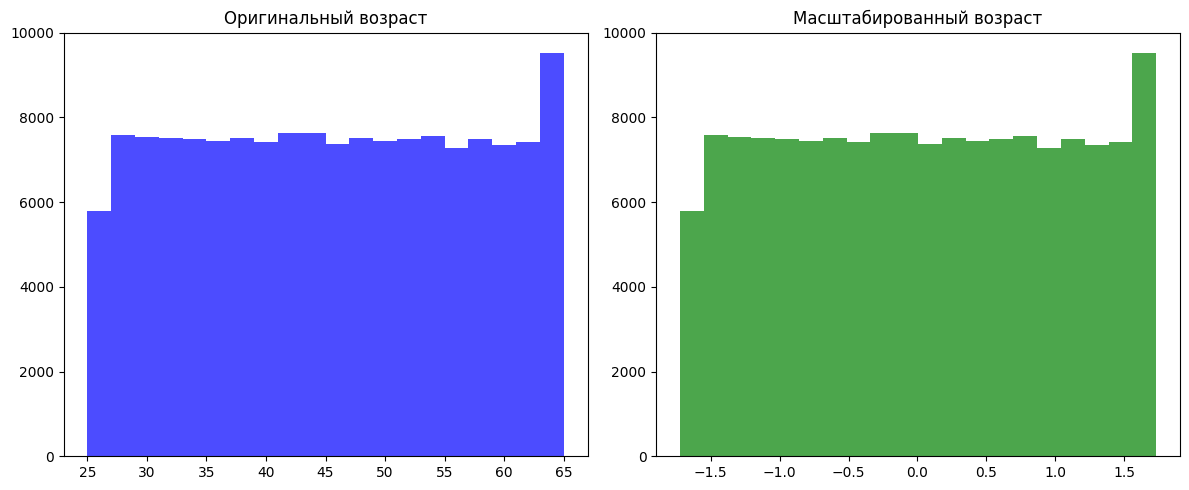


Проверка масштабирования:
Оригинальное среднее: 44.95, std: 11.57
Масштабированное среднее: -0.00, std: 1.00


In [2]:
# Масштабирование возраста
scaler = StandardScaler()
data['Age_Scaled'] = scaler.fit_transform(data[['Age']])

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Оригинальный возраст')
plt.subplot(1, 2, 2)
plt.hist(data['Age_Scaled'], bins=20, color='green', alpha=0.7)
plt.title('Масштабированный возраст')
plt.tight_layout()
plt.show()

# Проверка статистик
print(f"\nПроверка масштабирования:")
print(f"Оригинальное среднее: {data['Age'].mean():.2f}, std: {data['Age'].std():.2f}")
print(f"Масштабированное среднее: {data['Age_Scaled'].mean():.2f}, std: {data['Age_Scaled'].std():.2f}")

### Преобразование категориальных данных
**Label Encoding (для столбца City)**

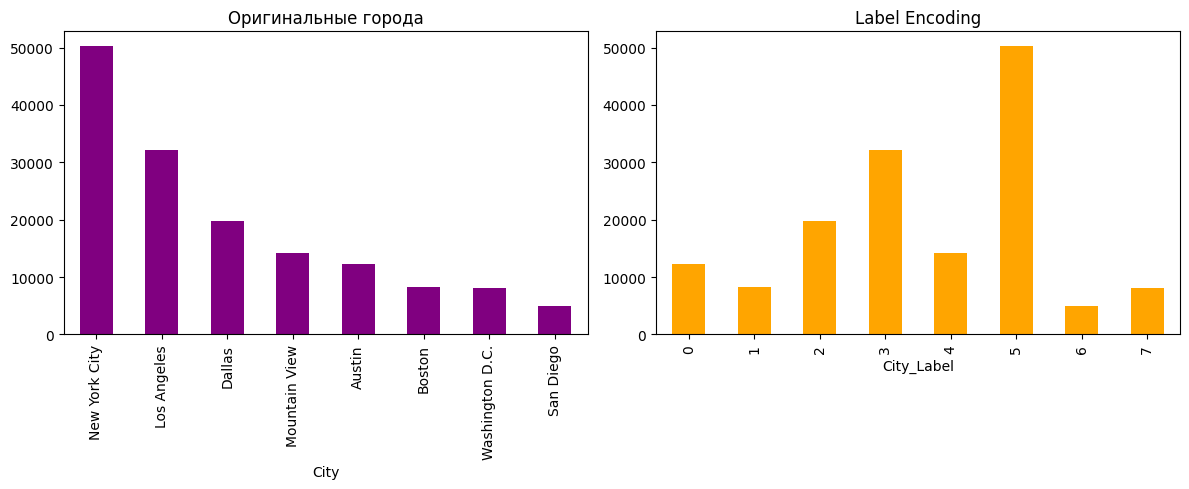


Пример Label Encoding:
     City  City_Label
0  Dallas           2
1  Dallas           2
2  Dallas           2
3  Dallas           2
4  Dallas           2


In [3]:
# Применение Label Encoding
data['City_Label'] = LabelEncoder().fit_transform(data['City'])

# Визуализация
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data['City'].value_counts().plot(kind='bar', color='purple')
plt.title('Оригинальные города')
plt.subplot(1, 2, 2)
data['City_Label'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Label Encoding')
plt.tight_layout()
plt.show()

print("\nПример Label Encoding:")
print(data[['City', 'City_Label']].head())

**One-Hot Encoding (для столбца City)**

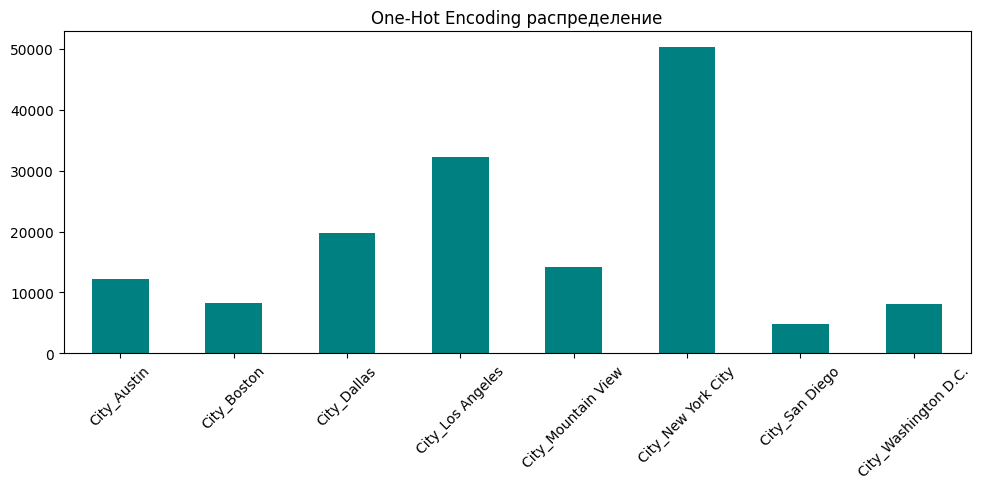


Пример One-Hot Encoding:
     City  City_Austin  City_Boston  City_Dallas  City_Los Angeles  \
0  Dallas          0.0          0.0          1.0               0.0   
1  Dallas          0.0          0.0          1.0               0.0   
2  Dallas          0.0          0.0          1.0               0.0   
3  Dallas          0.0          0.0          1.0               0.0   
4  Dallas          0.0          0.0          1.0               0.0   

   City_Mountain View  City_New York City  City_San Diego  \
0                 0.0                 0.0             0.0   
1                 0.0                 0.0             0.0   
2                 0.0                 0.0             0.0   
3                 0.0                 0.0             0.0   
4                 0.0                 0.0             0.0   

   City_Washington D.C.  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  


In [4]:
# Применение One-Hot Encoding
onehot = OneHotEncoder(sparse_output=False)
city_encoded = onehot.fit_transform(data[['City']])
encoded_cols = onehot.get_feature_names_out(['City'])
data[encoded_cols] = city_encoded

# Визуализация
plt.figure(figsize=(10, 5))
data[encoded_cols].sum().plot(kind='bar', color='teal')
plt.title('One-Hot Encoding распределение')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nПример One-Hot Encoding:")
print(data[['City'] + list(encoded_cols)].head())

**Вывод результатов кодирования**


Сравнение методов кодирования:
     City  City_Label  City_Austin  City_Boston  City_Dallas  \
0  Dallas           2          0.0          0.0          1.0   
1  Dallas           2          0.0          0.0          1.0   
2  Dallas           2          0.0          0.0          1.0   
3  Dallas           2          0.0          0.0          1.0   
4  Dallas           2          0.0          0.0          1.0   

   City_Los Angeles  City_Mountain View  City_New York City  City_San Diego  \
0               0.0                 0.0                 0.0             0.0   
1               0.0                 0.0                 0.0             0.0   
2               0.0                 0.0                 0.0             0.0   
3               0.0                 0.0                 0.0             0.0   
4               0.0                 0.0                 0.0             0.0   

   City_Washington D.C.  
0                   0.0  
1                   0.0  
2                   0.0  
3   

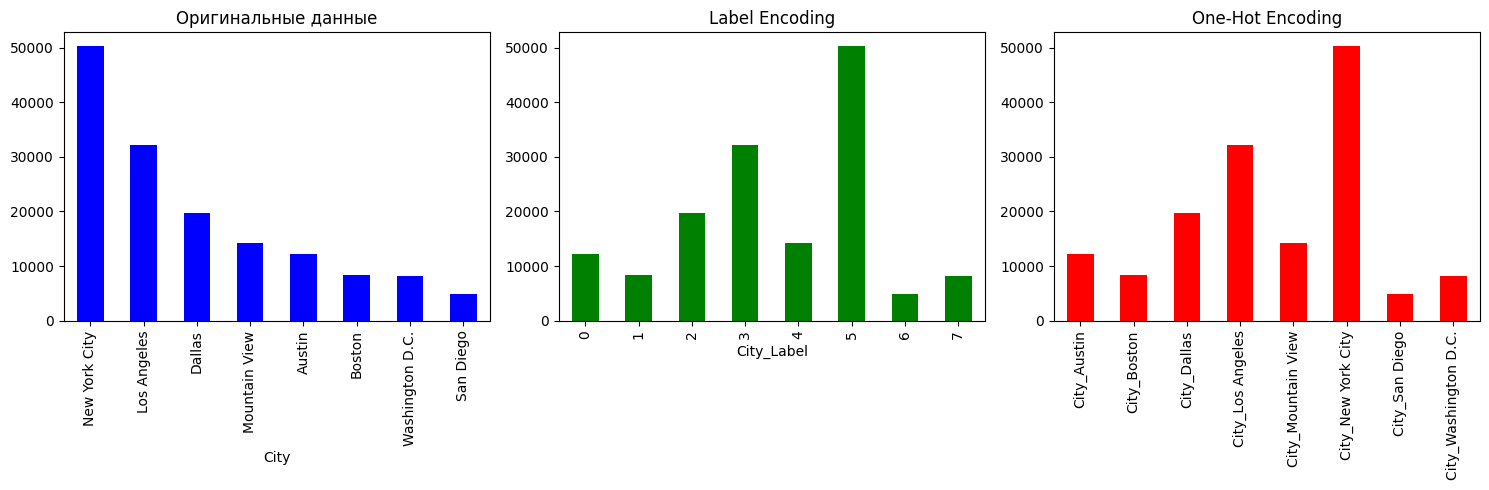

In [5]:
# Создаем сводную таблицу для сравнения
comparison = data[['City', 'City_Label'] + list(encoded_cols)].head()

print("\nСравнение методов кодирования:")
print(comparison)

# Визуализация сравнения
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
data['City'].value_counts().plot(kind='bar', color='blue')
plt.title('Оригинальные данные')
plt.subplot(1, 3, 2)
data['City_Label'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Label Encoding')
plt.subplot(1, 3, 3)
data[encoded_cols].sum().plot(kind='bar', color='red')
plt.title('One-Hot Encoding')
plt.tight_layout()
plt.show()

### Построение гистограммы (для столбца Income)

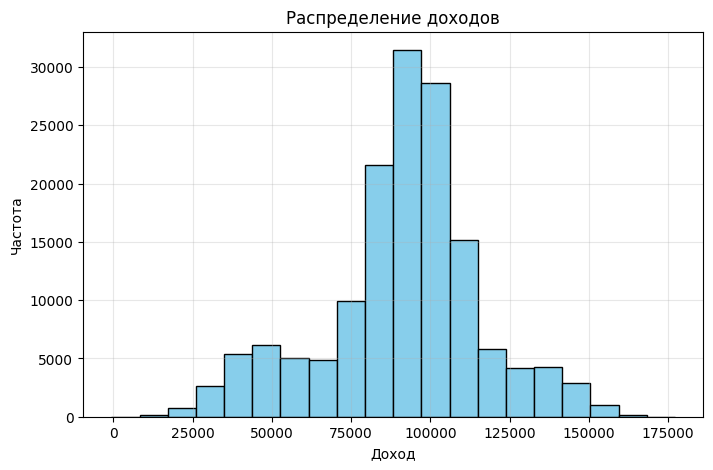

In [6]:
# Гистограмма для дохода
plt.figure(figsize=(8, 5))
plt.hist(data['Income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение доходов')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

### Выводы (Markdown)
##### Методы и их обоснование:
Масштабирование (StandardScaler) использовано для Age, чтобы привести данные к единому масштабу (нужно для алгоритмов, чувствительных к разным диапазонам, например, SVM или KNN).

Label Encoding применён к City, если города можно условно ранжировать (например, по размеру).
Минус: алгоритмы могут интерпретировать числа как порядковые (лучше подходит для деревьев решений).

One-Hot Encoding создаёт отдельные столбцы для каждого города, исключая ложную порядковую зависимость.
Плюс: подходит для номинальных данных. Минус: увеличивает размерность.

Гистограмма позволяет визуально оценить распределение данных (например, нормальное, равномерное или скошенное).